**Topological sorting** is a linear ordering of a directed graph's vertices, such that for every directed edge *uv* from vertex *u* to vertex *v*, *u* comes before *v* in the ordering. 

A topological ordering is possible only if the graph has no directed cycles (it is a directed acyclic graph). 

**Khan's algorithm** finds a topological ordering of vertices in a DAG. The algorithm works by:

In [ ]:
L ← Empty list that will contain the sorted elements

S ← Set of all nodes with no incoming edge

while S is not empty do
    remove a node n from S
    add n to L
    for each node m with an edge e from n to m do
        remove edge e from the graph
        if m has no other incoming edges then
            insert m into S

if graph has edges then
    return error   (graph has at least one cycle)
else 
    return L   (a topologically sorted order)

In [14]:
from collections import defaultdict, deque
import networkx as nx
import matplotlib.pyplot as plt

def Khan_topological_sort(graph):
    
    # Initialise list 
    L = []
    
    # Compute indegrees for all vertices 
    indegrees = defaultdict(int)
    for u in graph:
        for v in graph[u]:
            indegrees[v] += 1
            
    # Find all nodes with no incoming edges
    S = deque()
    for u in graph:
        if indegrees[u] == 0:
            S.append(u)
            
    # Perform topological sorting
    while S:
        n = S.popleft()
        L.append(n)
        
        # Remove outgoing edges from n
        for m in graph[n]:
            indegrees[m] -= 1
            
            if indegrees[m] == 0:
                S.append(m)
                
    if any(indegrees.values()):
        raise ValueError("The graph contains cycles")
        
    return L

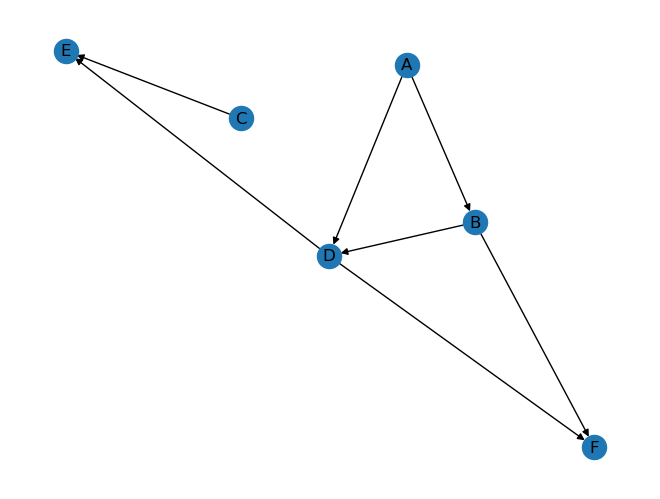

In [35]:
graph = {
    'A': ['B','D' ],
    'D': ['E', 'F'],
    'B': ['D', 'F'],
    'E': [],
    'C': ['E'],
    'F': []
}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for node in graph:
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)
        
# Plot the graph
pos = nx.spring_layout(G)  # Layout algorithm for node positioning
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

In [36]:
try:
    result = Khan_topological_sort(graph)
    print("Topological ordering:", result)
except ValueError as e:
    print("Error:", e)

Topological ordering: ['A', 'C', 'B', 'D', 'E', 'F']
